Compute a joint monomer contingency table by forming the outer product of the core composition vectors with the corona composition vectors

In [1]:
import data1 as data
import numpy as np

coronas = sorted(data.corona_comp)
cores = sorted(data.core_comp)

monomer_crosstab = 0
for i in range(len(data.polymers)):
    monomer_crosstab += np.outer(data.polymers[coronas].iloc[i], data.polymers[cores].iloc[i])

monomer_crosstab.round()

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   8.,   0.,   0.,   0.,
          0.],
       [  0.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  22.,   0.,   0.,   0.,
          0.],
       [  0.,  58.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  47.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [ 16.,   0.,   0.,   0.,  19.,  20.,  20., 154.,  45.,   0.,  25.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,  14.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,  

In [2]:
import pandas as pd

pd.crosstab([data.polymers['sphere'], data.polymers['other']], [data.polymers['worm'], data.polymers['vesicle']])

worm           -1        1    
vesicle        -1    1  -1   1
sphere other                  
-1     -1      31  104  78  46
        1      11    2   0   2
 1     -1     258   15  54   7

In [3]:
target_counts = data.polymers[data.targets].replace(-1, 0).sum(axis=0).astype(np.int64)
target_counts

sphere     334
worm       187
vesicle    176
other       15
dtype: int64

In [15]:
def succ(bitlist):
    res = bitlist[:]
    i = len(res) - 1
    while res[i] == 1:
        res[i] = -1
        i -= 1
    res[i] = 1
    return res

def lexorder_bitlists(n):
    current = [-1]*n
    last = [1]*n
    res = [current]
    while current!=last:
        current = succ(current)
        res += [current]
    return res    

def label(bitlist):
    return ' '.join([data.targets[i][:1] if bitlist[i]==1 else ' ' for i in range(4)])

def ind_prob(bitlist):
    p = 1
    for i in range(len(bitlist)):
        p*=(data.polymers[data.targets[i]].values == bitlist[i]).sum()/len(data.polymers)
    return p

def prob_and_inf_table(order):
    ids = set(range(1, 609))
    counts = np.zeros(shape=(16, 1), dtype=np.int64) 
    probs = np.zeros(shape=(16, 2))
    infs = np.zeros(shape=(16, 2))
    for i in range(len(order)):
        current = order[i]
        ids = ids - set(data.polymers[(data.polymers[data.targets] == current).all(axis=1)].index)
        count = (data.polymers[data.targets] == current).all(axis=1).sum()
        joint = count/len(data.polymers)
        ind = ind_prob(current)
        counts[i, 0] = count
        probs[i, 0] = joint
        probs[i, 1] = ind
        infs[i, 0] = -joint*(np.log2(joint)) if joint > 0 else 0
        infs[i, 1] = -joint*(np.log2(ind)) if joint > 0 else 0
    if ids: print('WARNING: ids',ids, 'remained unprocessed')
    return counts, probs, infs

size_based_order = np.array([[-1, -1, -1, -1],
                    [1, -1, -1, -1], [-1, 1, -1, -1], [-1, -1, 1, -1], [-1, -1, -1, 1],
                    [1, 1, -1, -1], [1, -1, 1, -1], [1, -1, -1, 1], [-1, 1, 1, -1], [-1, 1, -1, 1], [-1, -1, 1, 1],
                    [1, 1, 1, -1], [1, 1, -1, 1], [1, -1, 1, 1], [-1, 1, 1, 1],
                    [1, 1, 1, 1]])
morph_count_table, morph_prob_table, morph_inf_table = prob_and_inf_table(size_based_order)
morph_prob_table.round(decimals=3)

array([[0.051, 0.216],
       [0.424, 0.264],
       [0.128, 0.096],
       [0.171, 0.088],
       [0.018, 0.005],
       [0.089, 0.117],
       [0.025, 0.107],
       [0.   , 0.007],
       [0.076, 0.039],
       [0.   , 0.002],
       [0.003, 0.002],
       [0.012, 0.048],
       [0.   , 0.003],
       [0.   , 0.003],
       [0.003, 0.001],
       [0.   , 0.001]])

In [52]:
cm.gray(0.5)

(0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0)

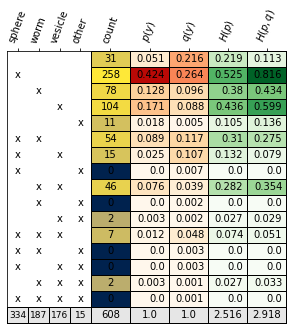

In [63]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

prob_colors = cm.get_cmap('OrRd')
# normalised = mpl.colors.LogNorm(0.000001, 0.5, True)
normalised = mpl.colors.Normalize(0.0, 0.5, True)
norm = normalised(morph_prob_table)

inf_colors = cm.get_cmap('Greens')
inf_normalised = mpl.colors.Normalize(0, 0.9, True)
inf_norm = inf_normalised(morph_inf_table)

count_colors = cm.get_cmap('cividis')
count_normalised = mpl.colors.LogNorm(0.000001, 258, True)
count_norm = count_normalised(morph_count_table).data

symb = np.vectorize(lambda x: 'x' if x==1 else ' ')

fig, ax = plt.subplots(figsize=(5, 5))

def plot_morphology_prob_table(ax=None):
    ax = ax if ax is not None else plt.gca()
    h_mt = 16/17 # main table height
    ax.table(cellText=np.array(symb(size_based_order)), bbox=[0, 1-h_mt, 0.3, h_mt], cellLoc='center', edges='open')
    ax.table(cellText=morph_count_table, cellLoc='center', cellColours=count_colors(count_norm), bbox=[0.3, 1-h_mt, 0.7/5, h_mt], edges='closed')
    ax.table(cellText=morph_prob_table.round(decimals=3), cellColours=prob_colors(norm.data), loc='center', bbox=[0.3+0.7/5, 1-h_mt, 2*0.7/5, h_mt], edges='closed')
    ax.table(cellText=morph_inf_table.round(decimals=3), cellColours=inf_colors(inf_norm.data), loc='center', bbox=[0.3+3*0.7/5, 1-h_mt, 1-0.3-3*0.7/5, h_mt], edges='closed')

    sums = [morph_count_table.sum()]+list(morph_prob_table.sum(axis=0).round(decimals=2))+list(morph_inf_table.sum(axis=0).round(decimals=3))
    ax.table(cellText=[[str(c) for c in target_counts]], cellColours=[[cm.gray(0.9)]*4], bbox=[0, 0, 0.3, 1/17], cellLoc='center', edges='closed')
    ax.table(cellText=[sums], cellColours=[[cm.gray(0.9)]*5], bbox=[0.3, 0, 0.7, 1/17], cellLoc='center', edges='closed')

    ax.xaxis.set_tick_params(rotation=70)
    ax.xaxis.set_major_locator(mpl.ticker.FixedLocator([0.3/8+0.3*i/4 for i in range(4)]+[0.3+0.7/10+i*0.7/5 for i in range(5)]))
    ax.xaxis.set_major_formatter(mpl.ticker.FixedFormatter(data.targets+['count', '$p(y)$', '$q(y)$', '$H(p)$', '$H(p,q)$']))
    ax.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)
    ax.tick_params(axis='y', left=False, labelleft=False)

plot_morphology_prob_table()

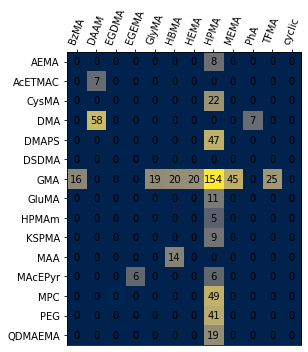

In [29]:
import os
from common import OUTPUTPATH

def plot_monomer_crosstab(crosstab, ax=None):
    ax = ax if ax is not None else plt.gca()
    ax.matshow(np.log2(crosstab+1), cmap='cividis')
    for i in range(12):
        for j in range(15):
            c = crosstab[j,i]
            ax.text(i, j, str(round(c)), va='center', ha='center')

    ax.xaxis.set_tick_params(rotation=70)
    ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(range(12)))
    ax.xaxis.set_major_formatter(mpl.ticker.FixedFormatter([s[5:] for s in cores]))
    ax.tick_params(axis='x', bottom=False, top=True, labelbottom=False, labeltop=True)

    ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(range(15)))
    ax.yaxis.set_major_formatter(mpl.ticker.FixedFormatter([s[7:] for s in coronas]))

fig, ax = plt.subplots(figsize=(5, 5))
plot_monomer_crosstab(monomer_crosstab)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUTPATH, 'monomer_counts.pdf'))
plt.show()

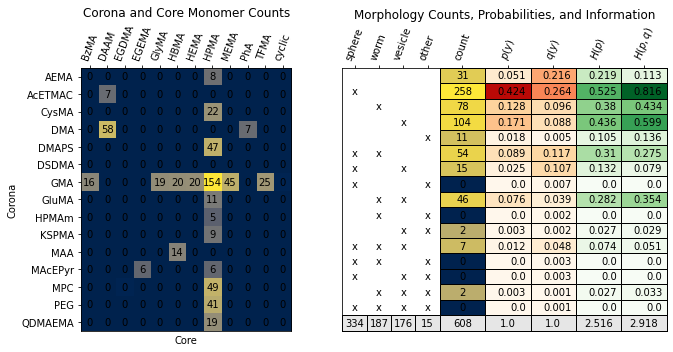

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot_monomer_crosstab(monomer_crosstab, ax1)
plot_morphology_prob_table(ax2)
ax1.set_ylabel('Corona')
ax1.set_xlabel('Core')
ax1.set_title('Corona and Core Monomer Counts')
ax2.set_title('Morphology Counts, Probabilities, and Information')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUTPATH, 'combined_monomer_morphology_counts.pdf'))
plt.show()